In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tqdm
import random

In [2]:
dataset_path = '/content/drive/MyDrive/CVPR/animals'

In [3]:
images = []
labels = []

for animal in os.listdir(dataset_path):
  labels.append(animal)
  animal_path = os.path.join(dataset_path, animal)
  print(f"Processing folder: {animal}")
  for img_filename in tqdm.tqdm(os.listdir(animal_path)):
    img_path = os.path.join(animal_path, img_filename)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (200, 200))
    images.append([img, labels.index(animal)])

Processing folder: dogs


100%|██████████| 1000/1000 [00:32<00:00, 30.64it/s]


Processing folder: cats


100%|██████████| 1000/1000 [00:25<00:00, 38.62it/s]


Processing folder: panda


100%|██████████| 1000/1000 [00:56<00:00, 17.84it/s]


In [4]:
len(images)

3000

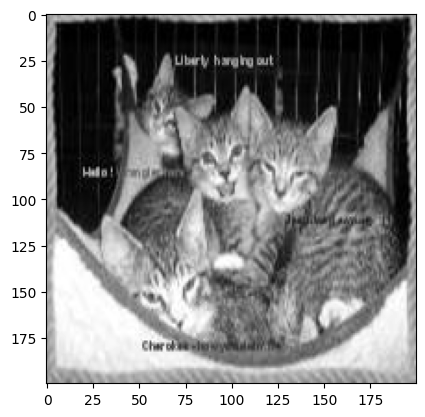

In [5]:
import matplotlib.pyplot as plt

image_data, label = images[1012] # Access the first image (index 0)
plt.imshow(image_data, cmap='gray')
plt.show()

In [6]:
random.shuffle(images)

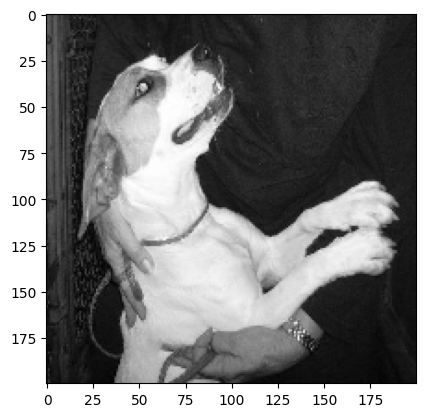

In [7]:
import matplotlib.pyplot as plt

image_data, label = images[1012] # Access the first image (index 0)
plt.imshow(image_data, cmap='gray')
plt.show()

In [8]:
def create_folds(images, fold_value):
  fold_size = len(images) // fold_value
  folds = [images[i * fold_size: (i+1) * fold_size] for i in range(fold_value)]
  return folds

folds = create_folds(images, 5)

In [9]:
train_set = []
for i in range(4):
  train_set += folds[i]

test_set = folds[4]

In [10]:
print("Length of train set:", len(train_set))
print("Length of test set:", len(test_set))


Length of train set: 2400
Length of test set: 600


In [11]:
def calculate_distances(train_set, test_set):
  l1_distances = []
  l2_distances = []

  for test_img in tqdm.tqdm(test_set):
    l1_for_one_img = []
    l2_for_one_img = []
    for train_img in train_set:
      l1 = np.sum(np.abs(test_img[0] - train_img[0]))
      l2 = np.sqrt(np.sum((test_img[0] - train_img[0]) ** 2))
      l1_for_one_img.append([l1, train_img[1]])  # Store distance and label
      l2_for_one_img.append([l2, train_img[1]])

    l1_distances.append(l1_for_one_img)
    l2_distances.append(l2_for_one_img)

  return l1_distances, l2_distances

l1_distances, l2_distances = calculate_distances(train_set, test_set)

100%|██████████| 600/600 [01:56<00:00,  5.16it/s]


In [12]:
def calculate_accuracy(distances, k_neighbors, test_set, num_folds):
  accuracies = [[] for _ in range(k_neighbors)]  # List of lists to store accuracies for each k and fold

  for k in range(1, k_neighbors + 1):
    for fold in range(num_folds):
      start = fold * (len(test_set) // num_folds)
      end = (fold + 1) * (len(test_set) // num_folds)
      fold_test_set = test_set[start:end]
      correct = 0
      for i, test_img in enumerate(fold_test_set):
        neighbors = sorted(distances[start + i], key=lambda x: x[0])[:k]
        predicted_label = max(set([n[1] for n in neighbors]), key=[n[1] for n in neighbors].count)
        if predicted_label == test_img[1]:
          correct += 1
      accuracies[k-1].append(correct / len(fold_test_set))  # Append accuracy for this fold and k

  return accuracies

# Example usage:
k_neighbors = 5
num_folds = 5
accuracy_l1 = calculate_accuracy(l1_distances, k_neighbors, test_set, num_folds)
accuracy_l2 = calculate_accuracy(l2_distances, k_neighbors, test_set, num_folds)

# ... (plotting code remains the same)

In [13]:
print("Accuracy (L1) for each k and fold:")
for i, accuracies_for_k in enumerate(accuracy_l1):
  print(f"k = {i+1}: {accuracies_for_k}")

print("\nAccuracy (L2) for each k and fold:")
for i, accuracies_for_k in enumerate(accuracy_l2):
  print(f"k = {i+1}: {accuracies_for_k}")

Accuracy (L1) for each k and fold:
k = 1: [0.4083333333333333, 0.4583333333333333, 0.35833333333333334, 0.39166666666666666, 0.3416666666666667]
k = 2: [0.4083333333333333, 0.43333333333333335, 0.35833333333333334, 0.4083333333333333, 0.2916666666666667]
k = 3: [0.39166666666666666, 0.4166666666666667, 0.4, 0.4666666666666667, 0.35]
k = 4: [0.375, 0.425, 0.38333333333333336, 0.475, 0.38333333333333336]
k = 5: [0.375, 0.5083333333333333, 0.43333333333333335, 0.5166666666666667, 0.43333333333333335]

Accuracy (L2) for each k and fold:
k = 1: [0.425, 0.35833333333333334, 0.45, 0.39166666666666666, 0.3333333333333333]
k = 2: [0.4666666666666667, 0.4, 0.425, 0.4166666666666667, 0.3416666666666667]
k = 3: [0.4666666666666667, 0.44166666666666665, 0.4083333333333333, 0.475, 0.35833333333333334]
k = 4: [0.475, 0.4, 0.45, 0.43333333333333335, 0.35833333333333334]
k = 5: [0.44166666666666665, 0.425, 0.4666666666666667, 0.4166666666666667, 0.38333333333333336]


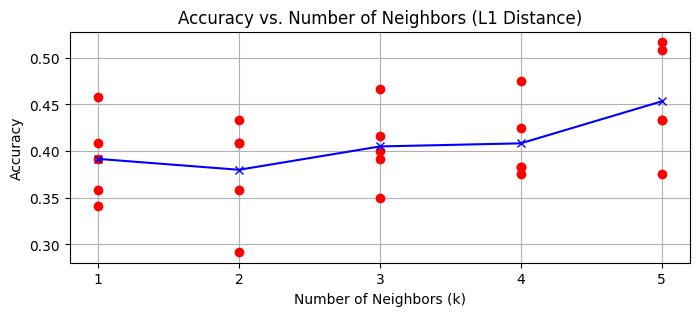

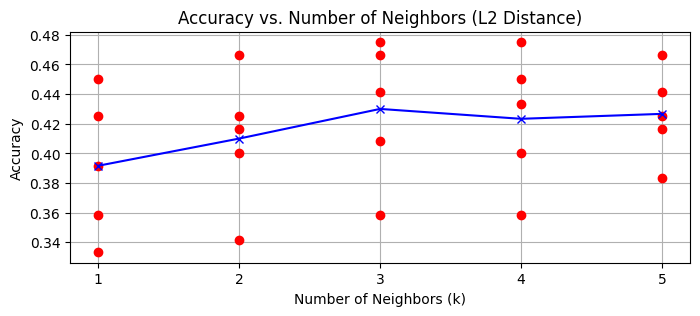

In [17]:
import matplotlib.pyplot as plt
import numpy as np
k_neighbors = 5
k_values = range(1, k_neighbors + 1)

# Assuming accuracy_l1 and accuracy_l2 are calculated earlier and available here
# ...

# Plot for L1 distance
plt.figure(figsize=(8, 3))
 # Calculate mean across folds for each k
plt.plot(k_values, accuracy_l1, marker='o', linestyle='', color='r')
mean_accuracy_l1 = np.mean(accuracy_l1, axis=1)
plt.plot(k_values, mean_accuracy_l1, marker='x', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (L1 Distance)')
plt.xticks(k_values)

plt.grid(True)
plt.show()

plt.figure(figsize=(8, 3))
 # Calculate mean across folds for each k
plt.plot(k_values, accuracy_l2, marker='o', linestyle='', color='r')
mean_accuracy_l2 = np.mean(accuracy_l2, axis=1)
plt.plot(k_values, mean_accuracy_l2, marker='x', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (L2 Distance)')
plt.xticks(k_values)

plt.grid(True)
plt.show()



<h1>Discussion

---



<h2> Comparison and Implications:


*   L1 distance shows a notable improvement as k increases, particularly at
k=5, suggesting that it may be better suited for this dataset when more neighbors are considered.
*  L2 distance has a slight edge for middle values of k but doesn't outperform L1 consistently.

However, Looking at the plots, L2 (Euclidean) distance shows a more consistent and generally higher accuracy across different values of
𝑘
k compared to L1 (Manhattan) distance. The L2 distance plot has higher peaks and less fluctuation in accuracy, which suggests that it might be more reliable for this specific dataset and classification task. Overall, L2 appears to provide better performance



<h2>Dataset's characteristics :<h4>

grayscale images with a resolution of 32x32—the nature of the features seems to favor the Euclidean distance for this specific classification task. However, the differences in accuracy between L1 and L2 are not substantial, indicating that both metrics are viable options, with L2 having a slight edge in this context.

<h2> Limitations : <h2>



1.  Grayscale images may miss important color information that could enhance classification.
2.   The k-NN algorithm might not capture complex patterns; more advanced models could be explored.
3.   The findings are specific to this dataset; different datasets and preprocessing could yield better results



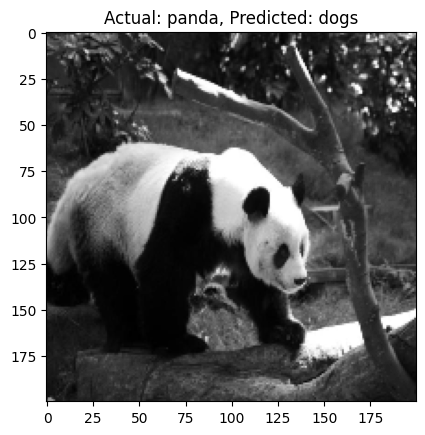

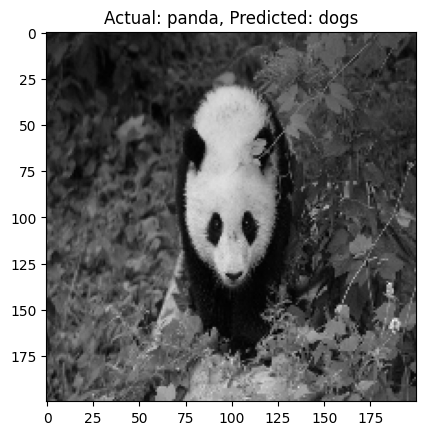

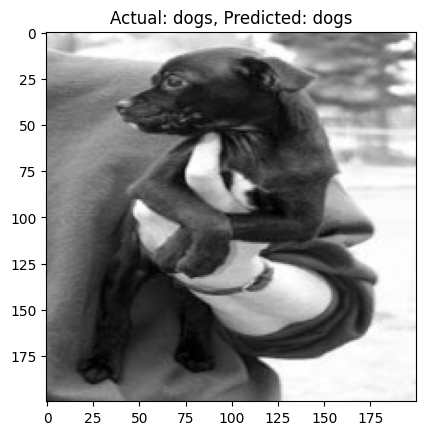

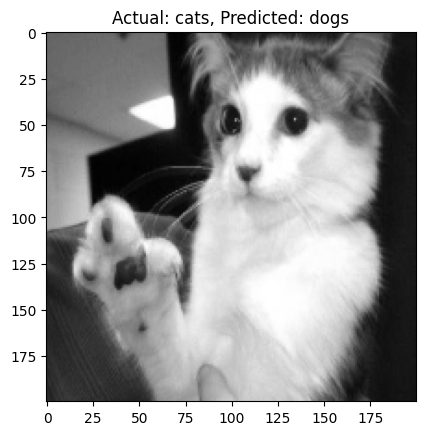

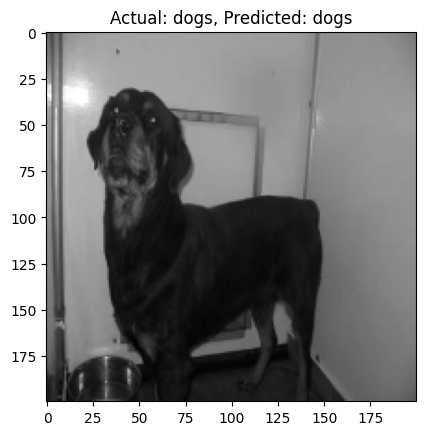

In [20]:
def predict_and_display_random(distances, test_set, labels, num_images=5, k_neighbors=5):
    import random
    random_indices = random.sample(range(len(test_set)), num_images)

    for i in random_indices:
        test_image = test_set[i]
        all_neighbors = []
        for dist in distances:
            all_neighbors.extend(dist)

        top_k_neighbors = sorted(all_neighbors, key=lambda x: x[0])[:k_neighbors]
        predicted_label = max(set([n[1] for n in top_k_neighbors]), key=[n[1] for n in top_k_neighbors].count)

        plt.imshow(test_image[0], cmap='gray')
        plt.title(f"Actual: {labels[test_image[1]]}, Predicted: {labels[predicted_label]}")
        plt.show()

# Example usage (assuming l1_distances is already calculated):
predict_and_display_random(l1_distances, test_set, labels)